In [1108]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

In [1383]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [583]:
#def P1(num_examples=5):
### STUDENT START ###

# This defines a function with default number of exampel set to 5
def P1(num_examples=5):
    for i in range(0,num_examples):
        # Prints out the example #, example text, label #, and label name
        print "Train data #%d: %s\nTrain label #%d: %s\n" % (i+1,train_data[i],i+1,newsgroups_train.target_names[train_labels[i]])

P1()

### STUDENT END ###
#P1(2)

Train data #1: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
Train label #1: comp.graphics

Train data #2: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


In [1384]:
#def P2():
### STUDENT START ###

print "a)"
# Defines a function to call CountVectorizer and create transformed feature vector (x)
# Takes arguments for word vs. character ngram, ngram range, vocab and minimum occurences with defaults
# Also returns alphabetized list of feature names using '.get_feature_names()'
def P2(data,analyzer='word',ngram_range=(1,1),vocabulary=None,min_df=1):
    vectorizer = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, vocabulary=vocabulary, min_df=min_df)
    x = vectorizer.fit_transform(data)
    y = vectorizer.get_feature_names()
    return (x,y)
# Defines 'word_feat' as the transformed feature vectors from the raw data
word_feat = P2(train_data)[0]

# Shape provides the dimensions of the matrix (rows, columns)
print "The vocabulary of the training data is %d unique words" % word_feat.shape[1]
# (2034 rows x 26879 columns)
# This means that the size of the vocabulary of the training data is 26,879 unique individual words


# Getnnz provides the count of non-zero features in the entire matrix
non_zero = word_feat.getnnz()*1.0
# Dividing the number of the non-zero values by the total number of rows (2034)
avg_nonz = non_zero / word_feat.shape[0]
# Gives the average number of non-zero features per example: 96
print "There is an average of %d non-zero features per example" % avg_nonz

# To find the total fraction of non-zero entries, 
# Need to divide the total number of spaces in the matrix
mtrx_spaces = word_feat.shape[0] * word_feat.shape[1]
# By the count of non-zero features in the matrix
pct_nonz = round(100.0 * non_zero / mtrx_spaces, 4)
print "The total proportion of non-zero entries is %s percent of the total" % (pct_nonz)

print "\nb)"
# Returns the feature strings, indexed in alphabetical order
train_vocab = P2(train_data)[1]
# Calls the first and last strings in the list
first = train_vocab[0]
last = train_vocab[-1]
# Question answer:
print "The first feature string is '%s' and the last is '%s'" % (first, last)

print "\nc)" 
# Defines the vocabulary list of interest
vocab_list = ["atheism","graphics","space","religion"]
# Stores the CountVectorizer feature with mapping to the vocab list
vocab_feat = P2(train_data,vocabulary=vocab_list)[0]
# Checks that the shape is still right, with only 4 vocab words
print vocab_feat.shape

# Takes the count of non-zero entries in the y  matrix
non_zero2 = vocab_feat.getnnz()*1.0
# Dividing the number of the non-zero values by the total number of rows (2034)
# For the average count of non-zero values per example
avg_nonz2 = non_zero2 / vocab_feat.shape[0]
# Question answer:
print "The total number of non-zero entries per example is %s" % (avg_nonz2)

print "\nd)"
# Use analyzer and ngram_range to extract bigram and trigram character features
bigram_train = P2(train_data, analyzer = 'char_wb', ngram_range=(2,2), min_df=1)[0]
print "Using bigram character features yields a vocabulary of %d." % bigram_train.shape[1]

trigram_vectorizer = P2(train_data,analyzer = 'char_wb', ngram_range=(3,3), min_df=1)[0]
print "Using trigram character features yields a vocabulary of %d." % trigram_train.shape[1]

print "\ne)"
# Return the transformed feature vector ignoring words appearing less than 10 times
vocab_min10 = P2(train_data,min_df=10)[0]
# Count the vocabulary now and print answer
print "Vocabulary with minimum 10 appearances is %d" % vocab_min10.shape[1]

print "\nf)" 
# Recall vocabulary for train_data is train_vocab
# Build vocabulary for dev_data
dev_vocab = P2(dev_data)[1]
# Calculate the proportion

# Iterate through each word in the dev_vocab list to see if the word is contained
# in the train_vocab list. Add to the counter if there is a match, skip it otherwise
count = 0
for i in range(0,len(dev_vocab)):
    if dev_vocab[i] in train_vocab:
        count += 1
# Calculate ratio of words matched in the train_vocab list to total vocabulary in dev_data
f_ans = round(1.0 * count / len(dev_vocab) * 100,2)
print "The trainining data vocabulary contains %.2f percent of the vocab of dev data" % f_ans

### STUDENT END ###
#P2()

a)
The vocabulary of the training data is 26879 unique words
There is an average of 96 non-zero features per example
The total proportion of non-zero entries is 0.3598 percent of the total

b)
The first feature string is '00' and the last is 'zyxel'

c)
(2034, 4)
The total number of non-zero entries per example is 0.268436578171

d)
Using bigram character features yields a vocabulary of 3090.
Using trigram character features yields a vocabulary of 25864.

e)
Vocabulary with minimum 10 appearances is 3064

f)
The trainining data vocabulary contains 75.21 percent of the vocab of dev data


In [1451]:
#def P3():
### STUDENT START ###

# Recall that 'word_feat' is the 2034x26879 sparse matrix for the training data
# Rename to 'train_feat' to make it more intuitive
# Define 'dev_feat' as the feature representation of the dev data
train_feat = word_feat
dev_feat = P2(dev_data, vocabulary = train_vocab)[0]

## KNN Section

# Define KNN function to find optimal number of k neighbors
# Using the guidance that the max should be the sqrt of the training examples
def num_k(a, b, c, d):
    high_score = {0:0}
    for i in range(1,int(np.sqrt(a.shape[0]))):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(a, b)
        dev_predicted_labels = model.predict(c)
        f_sco = 1.0 * metrics.f1_score(dev_predicted_labels, d, average = 'weighted')
        print "[%d] F score = %f" % (i,f_sco)

num_k(train_feat, train_labels, dev_feat, dev_labels)
# Appears that k = 42 provides the highest f1 score using weighted average approach

# Run the KNN model with k = 42
model = KNeighborsClassifier(n_neighbors=42)
model.fit(train_feat, train_labels)
dev_predicted_labels = model.predict(dev_feat)
metrics.f1_score(dev_predicted_labels, dev_labels, average = 'weighted')

# Calculate the number of incorrect predictions vs. total labels
wrong_prediction = (dev_predicted_labels != dev_labels)
print '\nKNN Percentage of dev label predictions correct: %3.3f percent' % (100 - 100.0*np.sum(wrong_prediction)/len(dev_labels))

## Naive Bayes Section

# Set alpha = 1 and run the Bernoulli Naive Bayes model on the dev data
alpha = 1
nbmodel = MultinomialNB(alpha=alpha)
nbmodel.fit(train_feat,train_labels)
print '\nMultinomial NB model accuracy on dev data: %3.3f percent' % (100.0*nbmodel.score(dev_feat, dev_labels))

# Use Grid Search to find the value of alpha with the highest accuracy
alphas = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
grid_alpha = GridSearchCV(estimator=nbmodel, param_grid=dict(alpha=alphas))

# fit the grid model to the training data
grid_alpha.fit(train_feat,train_labels)
print'\nThe best alpha value for train data is: %3.5f' % grid_alpha.best_estimator_.alpha
print 'Multinomial NB accuracy on dev data at best alpha is %3.3f percent correct' % (grid_alpha.score(dev_feat, dev_labels)*100.0)

## Logistic Regression Section

# Estimate a logistic regression model with l2 regularization and C =1 to start
logmodel = LogisticRegression(penalty='l2',C=1.0)
logmodel.fit(train_feat, train_labels)

log_predict = logmodel.predict(dev_feat)
wrong_pred = (log_predict != dev_labels)
print '\nLog Reg percentage of dev data label predictions correct: %3.2f percent' % (100 - 100.0*np.sum(wrong_pred)/len(dev_labels))

# Use Grid Search to optimize the C regularization weight
Cs = [0.0001, 0.001, 0.01, 0.1,0.2,0.5,1,2,5,10,20,50,100,500,1000,10000]
grid_C = GridSearchCV(estimator=logmodel, param_grid=dict(C=Cs))
grid_C.fit(train_feat,train_labels)
print'\nThe best C value on train data is: %3.5f' % grid_C.best_estimator_.C
print 'Log Reg accuracy on dev data at best C is %3.3f percent correct' % (grid_C.score(dev_feat, dev_labels)*100.0)

print "\na)"
print """ANSWER: I believe KNN doesn't do well here because the number of features is extremely high,
        which decreases its effectiveness.  Furthermore, the training set only contains about 75%
        of the vocabulary in the dev set, so about 25% of words in the dev data are missing."""

print "\nb)"
print """ANSWER: I think Naive Bayes does better than Logistic Regression here because there are a large
        number of features compared to the number of examples; therefore, the Logistic Regression model
        is prone to overfitting."""

print "\nc)"
# Returns the sum of squared coefficients for each class at various values for C
for i in Cs:
    log_x = LogisticRegression(penalty='l2',C=i)
    log_x.fit(train_feat, train_labels)
    coef_sum = (sum(log_x.coef_[0]**2) + sum(log_x.coef_[1]**2) + sum(log_x.coef_[2]**2) + sum(log_x.coef_[3]**2))
    print "C = %s, coefficients = %s" % (i,coef_sum)

print """\nANSWER: As the value of C increases, the sum of squared weights from all classes
        also increases. The increase is rapid at smaller values of C, and starts to slow at
        higher values."""

### STUDENT END ###
#P3()

[1] F score = 0.385769
[2] F score = 0.412357
[3] F score = 0.419987
[4] F score = 0.386818
[5] F score = 0.417393
[6] F score = 0.437950
[7] F score = 0.437095
[8] F score = 0.434673
[9] F score = 0.424380
[10] F score = 0.415345
[11] F score = 0.410667
[12] F score = 0.407300
[13] F score = 0.422110
[14] F score = 0.420747
[15] F score = 0.434230
[16] F score = 0.435469
[17] F score = 0.447864
[18] F score = 0.434994
[19] F score = 0.442119
[20] F score = 0.427729
[21] F score = 0.420060
[22] F score = 0.398868
[23] F score = 0.414368
[24] F score = 0.410353
[25] F score = 0.418214
[26] F score = 0.427079
[27] F score = 0.436480
[28] F score = 0.412455
[29] F score = 0.444914
[30] F score = 0.431987
[31] F score = 0.446513
[32] F score = 0.442680
[33] F score = 0.435823
[34] F score = 0.439339
[35] F score = 0.434150
[36] F score = 0.437470
[37] F score = 0.443739
[38] F score = 0.448885
[39] F score = 0.446514
[40] F score = 0.459956
[41] F score = 0.465742
[42] F score = 0.471683
[


The best C value for bigram model is: 1.00000

I think it's a little surprising that 'you are' and 'was just' are among
        the strongest features for predicting atheism.  Also 'out there' and 'is there'
        don't seem particularly related to computer graphics. Finally, it's interesting
        that 'cheers kent' is a strong predictor for both atheism and religion.


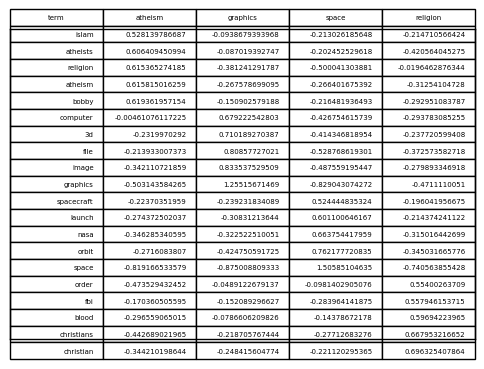

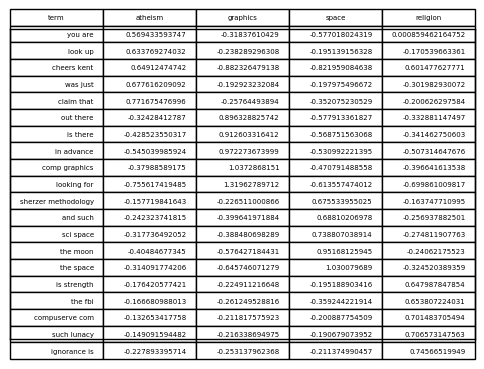

In [803]:
"""(4) Train a logistic regression model. Find the 5 features with the largest weights for each label 
-- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of 
these features for each of the labels. Create the table again with bigram features. Any surprising 
features in this table?"""

#def P4():
### STUDENT START ###
# Fit a logistic regression model for features = words, based on optimal C from above
logmodel2 = LogisticRegression(penalty='l2',C=0.2)
logmodel2.fit(train_feat, train_labels)

# Creates a function to output a list of tuples to be input for a data table
def max5(model=logmodel2,vocab=train_vocab):
    class_index = []
    table_data = []
    for i in range(0,4): # Represents the 4 classes
        for j in [-5,-4,-3,-2,-1]:
            class_index.append(np.argsort(model.coef_[i])[j]) # Sorts the coefficients and pulls top 5
    for k in class_index:
        # Creates a tuple of the vocab word at index k, and the corresponding coefficients in each class
        tup = (vocab[k],model.coef_[0][k],model.coef_[1][k],model.coef_[2][k],model.coef_[3][k])
        table_data.append(tup)
    return table_data

# Set the result to 'word_data'
word_data = max5()

# Define a function to create a table from the list of tuples
def table_plot(a):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    colLabels=("term","atheism","graphics","space","religion")
    the_table = ax.table(cellText=a,
          colLabels=colLabels,
          loc='center')

word_table = table_plot(word_data); word_table


# Create a bigram word feature vocabulary
bigram_case = P2(train_data, ngram_range=(2,2),min_df=1)
bigram_vocab = bigram_case[1]; bigram_feat = bigram_case[0]

# Train new logistic regression model for the bigram word features
logmodel3 = LogisticRegression(penalty='l2',C=1.0)
logmodel3.fit(bigram_feat, train_labels)

# Grid Search to find optimal C
grid_C3 = GridSearchCV(estimator=logmodel3, param_grid=dict(C=Cs))
grid_C3.fit(bigram_feat,train_labels)
print'\nThe best C value for bigram model is: %3.5f' % grid_C3.best_estimator_.C
# Looks like C = 1.0 is optimal, no further changes to logmodel3

# Return the bigram table data and arrange it into a table
bigram_data = max5(model=logmodel3,vocab=bigram_vocab)
bigram_table = table_plot(bigram_data); bigram_table

print """\nI think it's a little surprising that 'you are' and 'was just' are among
        the strongest features for predicting atheism.  Also 'out there' and 'is there'
        don't seem particularly related to computer graphics. Finally, it's interesting
        that 'cheers kent' is a strong predictor for both atheism and religion."""

### STUDENT END ###
#P4()

In [1377]:
def empty_preprocessor(s):
    return s

#def better_preprocessor(s):
### STUDENT START ###

# Copied over a list of stop words that may appear frequently but aren't really related to class
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

# Defining the preprocessing function
def better_preprocessor(s):
    t = s.lower() # Converts all of the text to lowercase
    for i in range(0,len(stop)):
        u = re.sub(r'\b'+stop[i]+r'\b',"", t) # Removes all the stop words
    v = re.sub(r'[^a-zA-Z0-9\s]',"", u) # Removes all non-letter, non-digit characters
    w = re.sub(r'\b(\w{6,6})\w+\b', r'\1', v) # Shortens all words longer than 6 characters
    x = re.sub(r'[a-z]*\d+[a-z]*','generic_num', w) # Changes all numbers to a single token
    return re.sub(r'\b\w{1,2}\b',"", x) # Removes all words shorter than 2 characters

### STUDENT END ###

#def P5():
### STUDENT START ###

# Defining the CountVectorizer function with preprocessor
def P5(data=train_data,prep=better_preprocessor, vocabulary=None):
    vectorizer = CountVectorizer(preprocessor=prep, vocabulary=vocabulary)
    x = vectorizer.fit_transform(data)
    y = vectorizer.get_feature_names()
    return (x,y)

# Return the spares features matrix and the vocab list after preprocessing
prep_feat = P5()[0]
prep_vocab = P5()[1]
# Find the vocab of the preprocessed data
prep_feat.shape

# Dictionary size reduction
print "Preprocessing reduced the size of the dictionary by %3.3f percent" % ((prep_feat.shape[1]*1.0/word_feat.shape[1]-1.0)*100)

logmodel_prep = LogisticRegression(penalty='l2',C=1.0)
logmodel_prep.fit(prep_feat, train_labels)

# Grid Search to find optimal C
grid_prep = GridSearchCV(estimator=logmodel_prep, param_grid=dict(C=Cs))
grid_prep.fit(prep_feat,train_labels)
print'\nThe best C value for the preprocessed model is: %3.5f' % grid_prep.best_estimator_.C

# Fit new log regression based on optimal C
logmodel_prep = LogisticRegression(penalty='l2',C=0.1)
logmodel_prep.fit(prep_feat, train_labels)

# Define the new preprocessed development data and vocab
dev_prep_feat = P5(data=dev_data, vocabulary=prep_vocab)[0]
dev_prep_vocab = P5(data=dev_data, vocabulary=prep_vocab)[1]

# Predict the labels for the dev data
log_predict_prep = logmodel_prep.predict(dev_prep_feat)

# Check the accuracy of the model
f1_prep = metrics.f1_score(dev_labels, log_predict_prep, average='weighted')
print f1_prep

# Calculate the f1 score for the original logistic regression model
f1_raw = metrics.f1_score(dev_labels, log_predict, average='weighted')

# Show the improvement from the preprocessing
print "\nPreprocessing improved the model by about %3.3f percentage points" % float(100*(f1_prep - f1_raw))

### STUDENT END ###
#P5()

Preprocessing reduced the size of the dictionary by -32.393 percent

The best C value for the preprocessed model is: 0.10000





Under L1 regularization, the number of non-zero weights depends heavily on the value of C.
        If C is very small, the number of valid weights also becomes low, almost approaching zero. 
        Conversely, the L1 regularization approaches full vocabulary at very high C values.  This is
        compared to L2 regularization, which does not drop weights at any C value.


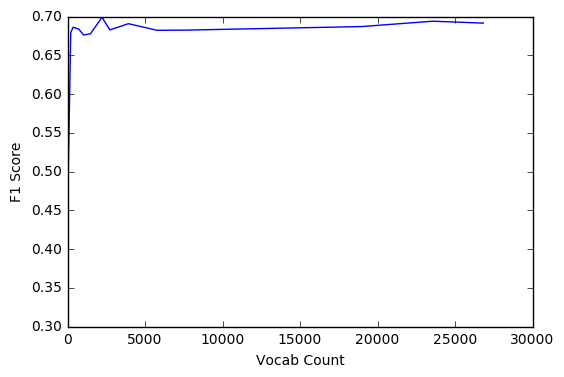

In [1621]:
# def P6():
# Keep this random seed here to make comparison easier.
np.random.seed(0)

# List of C regularization values from prior problem, but removing the lowest
# value so that the vocabulary list doesn't return zero
new_Cs = Cs[1:len(Cs)]

# Function that tests different C values and returns the Cvalue, vocab count and f1 score
def P6(penalty='l1',C=new_Cs):
    # lists to hold Cvalue, count of nonzero weights, and f1 score
    C_sco = []
    counts = []
    f1_sco = []
    # fits a logistic regression model for each value of C
    for i in C:
        model = LogisticRegression(penalty=penalty,C=i,tol=0.01)
        model.fit(word_feat, train_labels)
        ct = 0
        good_feat = [] # list to hold the features with coef != 0 
        for j in range(0,len(model.coef_[0])): # iterates through features
            # checks to see if any of the coefficients at each feature index is != 0
            if (model.coef_[0][j] or model.coef_[1][j] or model.coef_[2][j] or model.coef_[3][j]) != 0:
                ct += 1 # if so, increases the count by 1...
                good_feat.append(train_vocab[j]) # and adds to the vocab list
        C_sco.append(i) # tracks the current Cvalue 
        counts.append(ct) # and list of the counts of nonzero weights for each Cvalue
        train_l2_feat = P2(train_data,vocabulary=good_feat)[0] # new feature list with vocab pruning
        train_l2_model = LogisticRegression(C=i,tol=0.01) # training an L2 regression for the pruned features
        train_l2_model.fit(train_l2_feat,train_labels) # fits the new model on the pruned features
        dev_l2_feat = P2(dev_data,vocabulary=good_feat)[0] # applies the same vocab list to the dev data features
        predict_l2 = train_l2_model.predict(dev_l2_feat) # predicts the class of each vector of features
        f1_l2 = metrics.f1_score(dev_labels, predict_l2, average='weighted') # accuracy score at current Cvalue
        f1_sco.append(f1_l2) # adds F1 score to the list
    return C_sco, counts, f1_sco

# Sets 'pruning_results' for the function
pruning_results = P6()

# comparison of nonzero weights for L1 and L2 regularization at different values of C
l1_counts = pruning_results[1]; print "L1 nonzero count:", l1_counts 
l2_counts = P6(penalty='l2')[1]; print "L2 nonzero count:", l2_counts

print """\nUnder L1 regularization, the number of non-zero weights depends heavily on the value of C.
        If C is very small, the number of valid weights also becomes low, almost approaching zero. 
        Conversely, the L1 regularization approaches full vocabulary at very high C values.  This is
        compared to L2 regularization, which does not drop weights at any C value."""

# Setting up coordinates for plot, with vocab size on the x-axis, and f1 score on the y-axis
x_coord = pruning_results[1]
y_coord = pruning_results[2]

# Plotting the coordinates
plt.plot(x_coord, y_coord)
plt.xlabel('Vocab Count'), plt.ylabel('F1 Score')
plt.show()

### STUDENT END ###
# P6()

In [1698]:
#def P7():
### STUDENT START ###

# New function to apply TfidfVectorizer (similar inputs to P2)
def P7(data=train_data,analyzer='word',ngram_range=(1,1),min_df=1,vocabulary=None):
    tfidf = TfidfVectorizer(analyzer=analyzer,ngram_range=ngram_range,min_df=min_df,vocabulary=vocabulary)
    x = tfidf.fit_transform(data)
    return x

# Tfidf features for the training data
train_tfidf = P7()
# Same for dev data, using train_vocab
dev_tfidf = P7(data=dev_data,vocabulary=train_vocab)

print """TfidfVectorizer is different from CountVectorizer in that it normalizes
the results, by offsetting the frequency of occurrence within a given document
against the frequency of occurrence in the overall collection of documents, to
account for words that show up more frequently in general. The CountVectorizer, 
on the other hand, just returns the counts of each word in the document."""

# Training the logistic regression model on the normalized features (C=100)
logreg_tfidf = LogisticRegression(penalty='l2',C=100)
logreg_tfidf.fit(train_tfidf, train_labels)
# Predicted classes for each document
logreg_pred = logreg_tfidf.predict(dev_tfidf)
# Predicted probabilities of a document belonging to each class
logreg_prob = logreg_tfidf.predict_proba(dev_tfidf)

# Function to calculate R (max predicted prob / true predicted prob)
def r_calc(prob=logreg_prob):
    max_prob = []
    true_prob = []
    R = []
    for i in range(0,len(logreg_prob)):
        max_prob.append(max(logreg_prob[i]))
        true_prob.append(logreg_prob[i][dev_labels[i]])
        R.append(max_prob[i]/true_prob[i])
    return R

# Stores the function as 'r_list'
r_list = r_calc()

# Finds the index points in dev_data corresponding to maximum R
r_index = np.argsort(r_list)[-3:]; print r_index, "\n------------------------"

# Output the documents with the highest R values (ascending R values)
print "\n",dev_data[r_index[0]], """\n
\nCorrect label: %s\nPredicted label: %s\n---------------------""" % (newsgroups_train.target_names[dev_labels[r_index[0]]],
                                                                      newsgroups_train.target_names[logreg_pred[r_index[0]]])
print "\n",dev_data[r_index[1]], """\n
\nCorrect label: %s\nPredicted label: %s\n---------------------""" % (newsgroups_train.target_names[dev_labels[r_index[1]]],
                                                                      newsgroups_train.target_names[logreg_pred[r_index[1]]])
print "\n",dev_data[r_index[2]], """\n
\nCorrect label: %s\nPredicted label: %s\n---------------------""" % (newsgroups_train.target_names[dev_labels[r_index[2]]],
                                                                      newsgroups_train.target_names[logreg_pred[r_index[2]]])

print """\nThe TfidfVectorizer model seems to be making mistakes by discounting the weight
of relgious words that might be more commonly seen throughout the corpus (since the classes
include atheism and religion).  Two of the incorrect predictions involve 'Book of Mormon', 
but predicted computer graphics.  I think this is because 'Mormon' doesn't appear as many
times in the document as the computer terms, and even though it should be strongly-weighted,
its likely frequent appearance throughout the corpus probably lowers the weighting.

My proposed solution to this would be to set some priors with respect to certain terms that
should strongly signal a certain class (i.e. Mormon, religion, computer, etc.)."""

### STUDENT END ###
#P7()

TfidfVectorizer is different from CountVectorizer in that it normalizes
the results, by offsetting the frequency of occurrence within a given document
against the frequency of occurrence in the overall collection of documents, to
account for words that show up more frequently in general. The CountVectorizer, 
on the other hand, just returns the counts of each word in the document.
[665 607 215] 
------------------------

Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 


Correct label: talk.religion.misc
Predicted label: comp.graphics
---------------------


The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...



Correct label: alt.atheism
Predicted label: talk.religion.misc
---------------------

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_